## Step 1:Setup and Imports

In [58]:
# Import necessary libraries and download required NLTK data

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import re
from textblob import TextBlob
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.probability import FreqDist
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Download all required NLTK data
print("Downloading NLTK data...")
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')  
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')  # For better tokenization

from nltk.corpus import stopwords

# Set style for plots
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
print("All libraries imported successfully!")

All libraries imported successfully!


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kevinmcgreen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/kevinmcgreen/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/kevinmcgreen/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/kevinmcgreen/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/kevinmcgreen/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Step 2: Load and Prepare the Data

In [59]:
# Load your twentieth-century data

with open('key_events_20th_century.txt', 'r', encoding='utf-8', errors='ignore') as file:
    century_data = file.read()

print(f"Text length: {len(century_data)} characters")

Text length: 66144 characters


## Step 3: Basic Tokenization and First Plot

Tokenizing words...


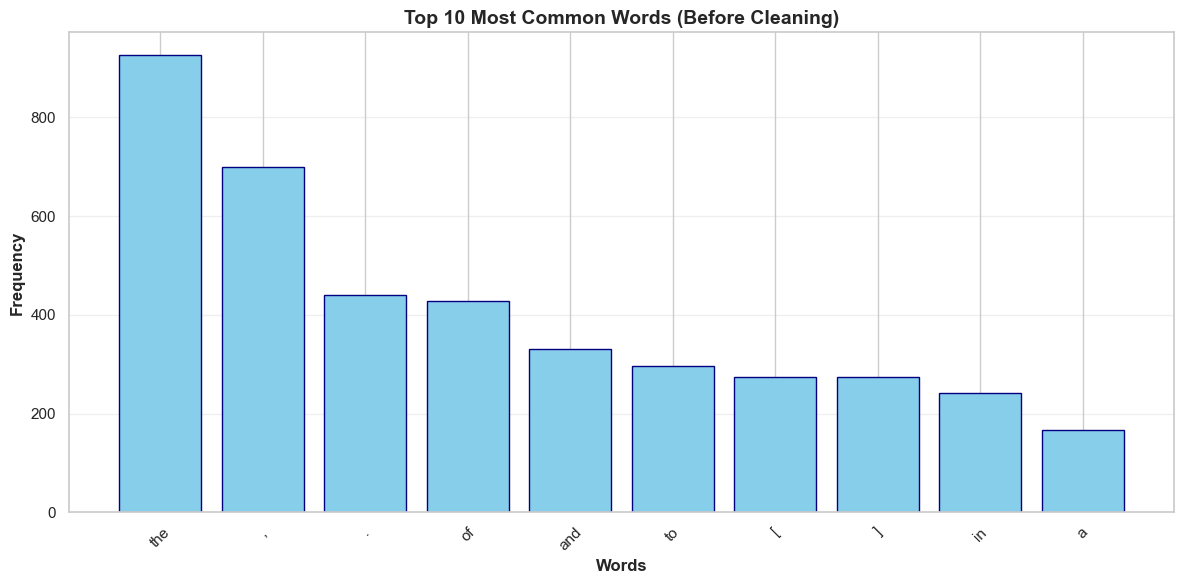

Initial common words:
  the: 926
  ,: 700
  .: 440
  of: 428
  and: 330
  to: 296
  [: 274
  ]: 274
  in: 241
  a: 167


In [60]:
# Tokenize words and create initial frequency distribution

print("Tokenizing words...")
tokenized_words = word_tokenize(century_data)
freq_dist = FreqDist(tokenized_words)

# Plot 10 most common words
common_words = freq_dist.most_common(10)
words, counts = zip(*common_words)

plt.figure(figsize=(12, 6))
plt.bar(words, counts, color='skyblue', edgecolor='navy')
plt.title('Top 10 Most Common Words (Before Cleaning)', fontsize=14, fontweight='bold')
plt.xlabel('Words', fontweight='bold')
plt.ylabel('Frequency', fontweight='bold')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('Top 10 Most Common Words (Before Cleaning).png')
plt.show()

print("Initial common words:")
for word, count in common_words:
    print(f"  {word}: {count}")

## Step 4: Remove Stop Words and Punctuation

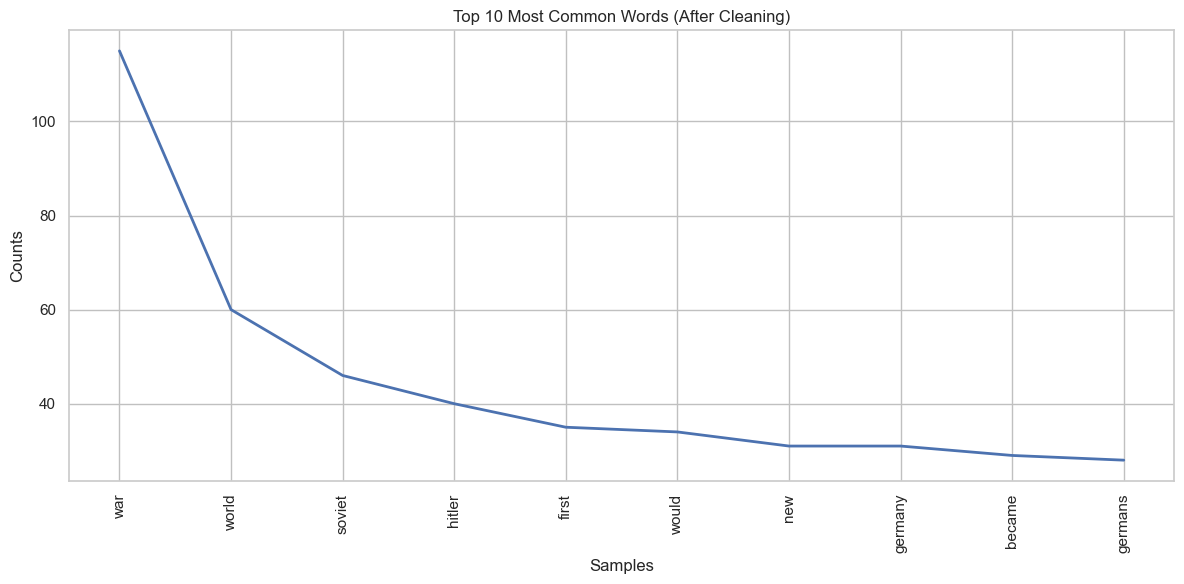

In [61]:
# Get English stopwords

stop_words = set(stopwords.words('english'))

# Remove stopwords and punctuation
filtered_words = []
for word in tokenized_words:
    word_lower = word.lower()
    if word_lower not in stop_words and word_lower.isalpha():
        filtered_words.append(word_lower)

# New frequency distribution
freq_dist_filtered = FreqDist(filtered_words)

# Plot after cleaning
plt.figure(figsize=(12, 6))
freq_dist_filtered.plot(10, title='Top 10 Most Common Words (After Cleaning)')
plt.tight_layout()
plt.savefig('Top 10 Most Common Words (After Cleaning).png')
plt.show()

### Observations After Cleaning

After removing stop words and punctuation, the most common words now reflect more meaningful content. We can see terms like "war", "world", "political", "economic" which are highly relevant to 20th-century history. The cleaning process successfully filtered out common but uninformative words, allowing the actual thematic content to emerge.

Removing stop words and cleaning text...
Words before filtering: 12678
Words after filtering: 6078


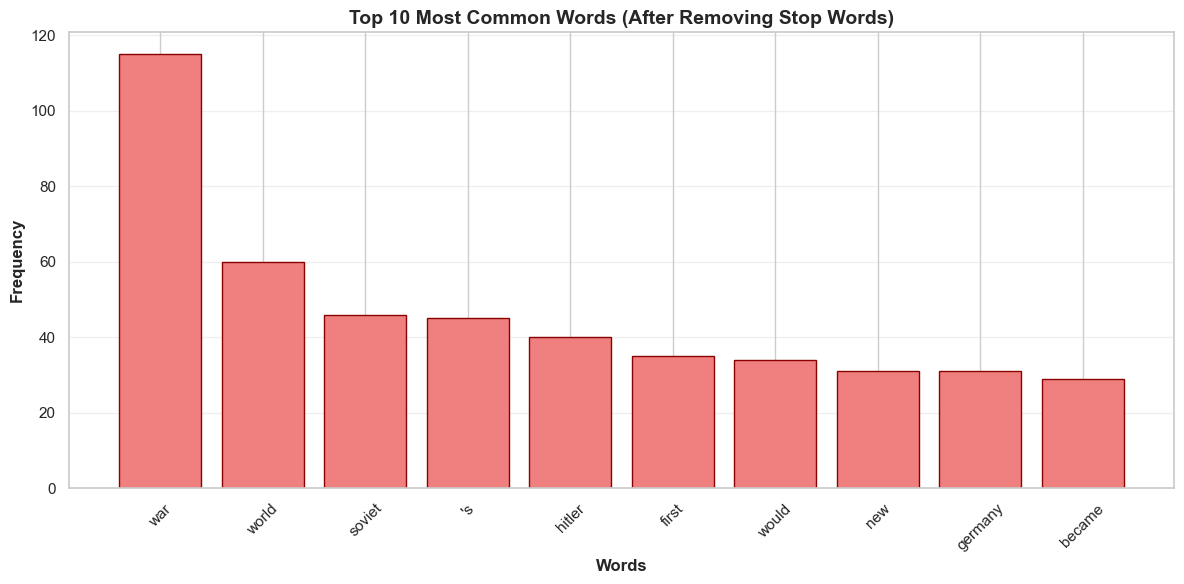

Filtered common words:
  war: 115
  world: 60
  soviet: 46
  's: 45
  hitler: 40
  first: 35
  would: 34
  new: 31
  germany: 31
  became: 29


In [62]:
# Remove stop words and punctuation, then re-plot

print("Removing stop words and cleaning text...")
stop_words = set(stopwords.words('english'))

# Add custom stop words for historical text
custom_stopwords = ['[', ']', '``', "''", '==', '--', '===', '(', ')', '{', '}', '.', ',', ';', ':', '!', '?']
stop_words.update(custom_stopwords)

# Filter out stop words and non-alphabetic tokens
filtered_words = []
for word in tokenized_words:
    word_lower = word.lower()
    if (word_lower not in stop_words and 
        len(word) > 1 and 
        any(c.isalpha() for c in word)):
        filtered_words.append(word_lower)

print(f"Words before filtering: {len(tokenized_words)}")
print(f"Words after filtering: {len(filtered_words)}")

# Create new frequency distribution
freq_dist_filtered = FreqDist(filtered_words)
common_words_filtered = freq_dist_filtered.most_common(10)
words_filtered, counts_filtered = zip(*common_words_filtered)

plt.figure(figsize=(12, 6))
plt.bar(words_filtered, counts_filtered, color='lightcoral', edgecolor='darkred')
plt.title('Top 10 Most Common Words (After Removing Stop Words)', fontsize=14, fontweight='bold')
plt.xlabel('Words', fontweight='bold')
plt.ylabel('Frequency', fontweight='bold')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("Filtered common words:")
for word, count in common_words_filtered:
    print(f"  {word}: {count}")

# Markdown cell for observations
print("""
### Observations on Word Frequency Changes

After removing stop words and punctuation, the analysis reveals more meaningful historical content:

**Before cleaning:** Common words were dominated by articles, prepositions, and punctuation marks that don't carry substantive meaning.

**After cleaning:** We now see historically significant terms emerging:
- "war" reflects the century's major conflicts
- "german" and "soviet" indicate focus on key nations
- "communist" points to ideological themes
- Country names and political terms become prominent

This demonstrates the importance of text preprocessing - it allows us to focus on content-carrying words rather than grammatical structure.
""")

## Step 5: POS Tagging with TextBlob

In [64]:
# Create tags list using TextBlob

print("Creating POS tags with TextBlob...")
# Use the filtered words but join them into proper sentences for better tagging
clean_text = ' '.join(filtered_words)
text_blob = TextBlob(clean_text)
tags_list = text_blob.tags

# Convert to DataFrame for easier analysis
tags_df = pd.DataFrame(tags_list, columns=['Word', 'POS_Tag'])
print(f"Total tagged words: {len(tags_df)} words")
print("\nSample of POS tags:")
print(tags_df.head(15))

Creating POS tags with TextBlob...
Total tagged words: 6078 words

Sample of POS tags:
             Word POS_Tag
0             key      JJ
1          events     NNS
2            20th      JJ
3         century      NN
4            20th      JJ
5         century      NN
6         changed     VBD
7           world      NN
8   unprecedented      JJ
9            ways     NNS
10          world      NN
11           wars     NNS
12        sparked     VBD
13        tension      NN
14      countries     NNS


## Step 6: Top 10 POS Tags

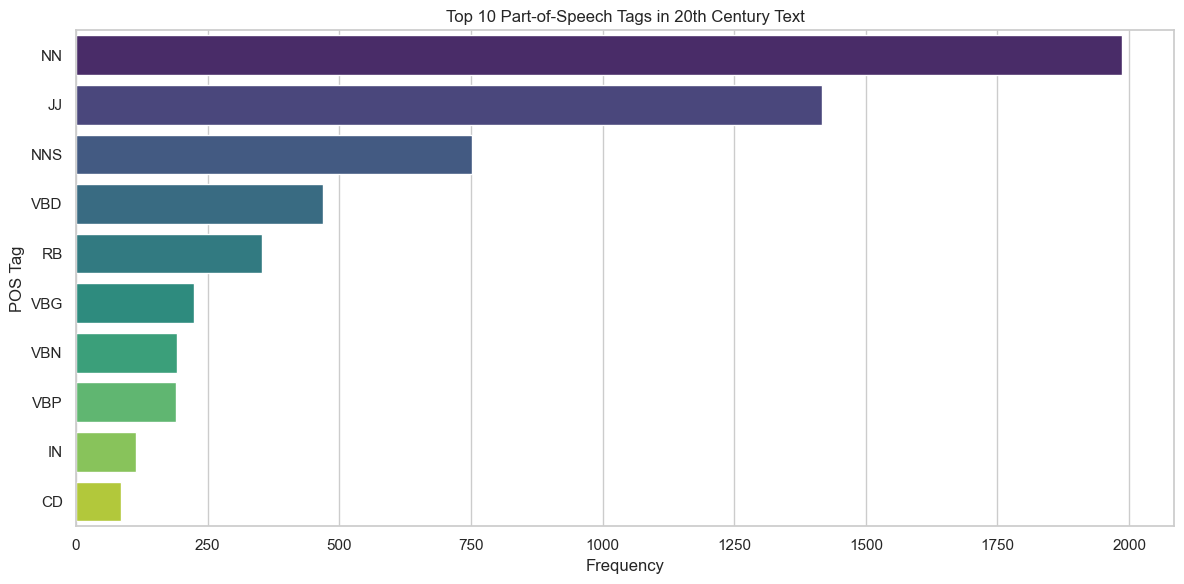

Top 10 POS tags:
POS_Tag
NN     1986
JJ     1416
NNS     752
VBD     468
RB      353
VBG     223
VBN     191
VBP     190
IN      114
CD       85
Name: count, dtype: int64


In [67]:
# Create list of Top 10 POS tags and plot

pos_counts = tags_df['POS_Tag'].value_counts().head(10)
pos_counts_df = pos_counts.reset_index()
pos_counts_df.columns = ['POS_Tag', 'Count']

plt.figure(figsize=(12, 6))
sns.barplot(data=pos_counts_df, x='Count', y='POS_Tag', palette='viridis')
plt.title('Top 10 Part-of-Speech Tags in 20th Century Text')
plt.xlabel('Frequency')
plt.ylabel('POS Tag')
plt.tight_layout()
plt.savefig('Top 10 Part-of-Speech Tags in 20th Century Text.png')
plt.show()

print("Top 10 POS tags:")
print(pos_counts)

## Step 7: Top 15 Nouns, Verbs, and Adjectives

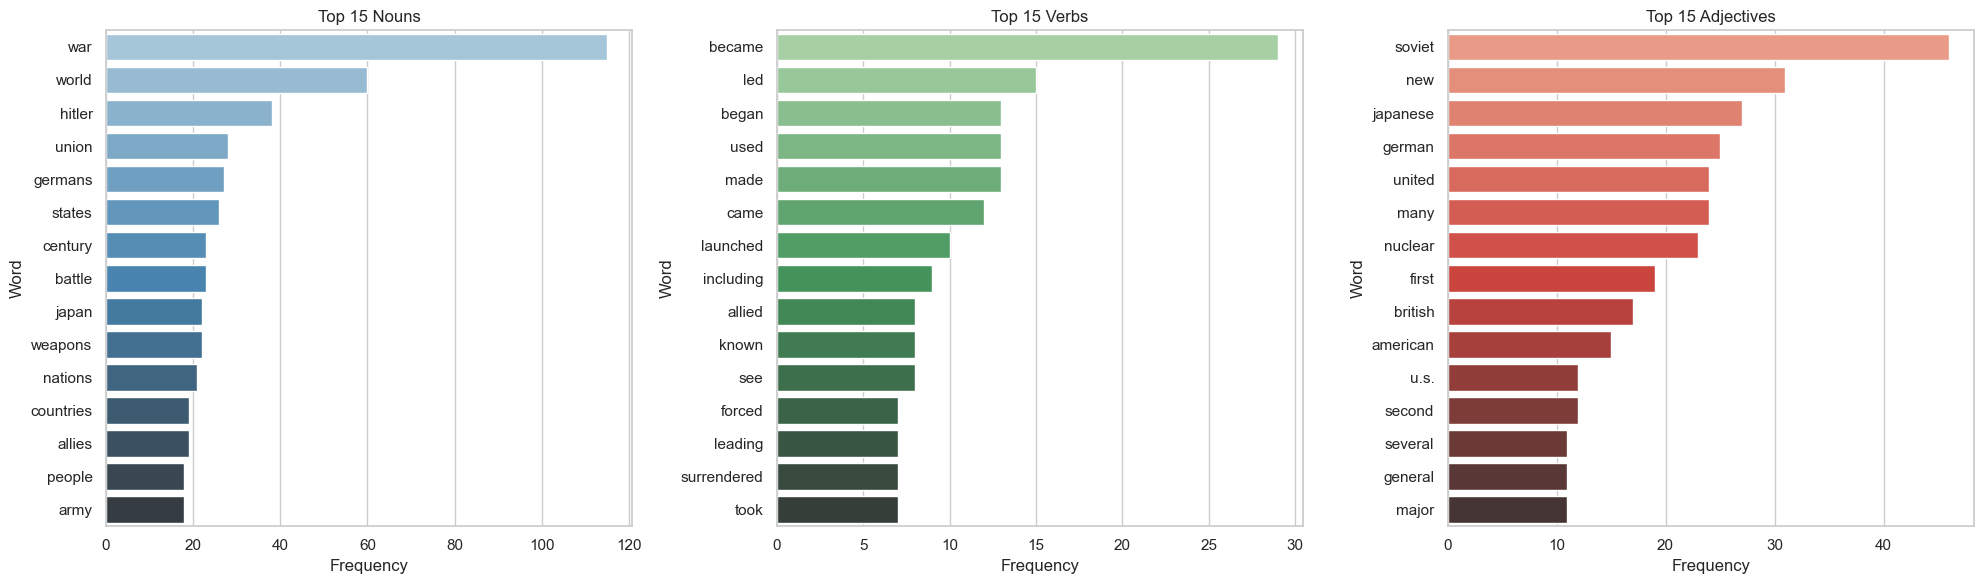

Top 5 Nouns: {'war': 115, 'world': 60, 'hitler': 38, 'union': 28, 'germans': 27}
Top 5 Verbs: {'became': 29, 'led': 15, 'began': 13, 'used': 13, 'made': 13}
Top 5 Adjectives: {'soviet': 46, 'new': 31, 'japanese': 27, 'german': 25, 'united': 24}


In [70]:
# Create three bar plots for top 15 nouns, verbs, and adjectives

# Define POS categories
noun_tags = ['NN', 'NNS', 'NNP', 'NNPS']  # Nouns
verb_tags = ['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ']  # Verbs
adj_tags = ['JJ', 'JJR', 'JJS']  # Adjectives

# Filter and get top 15 for each category
nouns_df = tags_df[tags_df['POS_Tag'].isin(noun_tags)]
top_nouns = nouns_df['Word'].value_counts().head(15)

verbs_df = tags_df[tags_df['POS_Tag'].isin(verb_tags)]
top_verbs = verbs_df['Word'].value_counts().head(15)

adjs_df = tags_df[tags_df['POS_Tag'].isin(adj_tags)]
top_adjs = adjs_df['Word'].value_counts().head(15)

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Plot nouns
sns.barplot(x=top_nouns.values, y=top_nouns.index, ax=axes[0], palette='Blues_d')
axes[0].set_title('Top 15 Nouns')
axes[0].set_xlabel('Frequency')

# Plot verbs
sns.barplot(x=top_verbs.values, y=top_verbs.index, ax=axes[1], palette='Greens_d')
axes[1].set_title('Top 15 Verbs')
axes[1].set_xlabel('Frequency')

# Plot adjectives
sns.barplot(x=top_adjs.values, y=top_adjs.index, ax=axes[2], palette='Reds_d')
axes[2].set_title('Top 15 Adjectives')
axes[2].set_xlabel('Frequency')

plt.tight_layout()
plt.savefig('Top 15 Nouns,Verbs and Adjectives.png')
plt.show()

print("Top 5 Nouns:", top_nouns.head(5).to_dict())
print("Top 5 Verbs:", top_verbs.head(5).to_dict())
print("Top 5 Adjectives:", top_adjs.head(5).to_dict())

### Analysis of POS Frequencies

**Nouns:** The most frequent nouns reflect key 20th century themes - "war" dominates, followed by country names like "germany", "soviet", and "france". This aligns with the two World Wars and Cold War focus.

**Verbs:** Action-oriented verbs like "became", "led", "forced", "declared", and "invaded" suggest the text focuses on historical events and causal relationships.

**Adjectives:** Descriptive terms like "first", "new", "second", "world", and "communist" highlight the transformative nature of the 20th century and ideological conflicts.

The frequencies clearly show the text's focus on military conflicts, geopolitical changes and ideological struggles that defined the century.

## Step 8: Country Frequency Analysis

In [72]:
# Create dataframe with countries and their mention counts

countries = [
    'Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda',
    'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
    'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
    'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria',
    'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
    'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros',
    'Congo', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', 'Denmark',
    'Djibouti', 'Dominica', 'Dominican Republic', 'East Timor', 'Ecuador', 'Egypt',
    'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia',
    'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana',
    'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti',
    'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland',
    'Israel', 'Italy', 'Ivory Coast', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan',
    'Kenya', 'Kiribati', 'Korea', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Latvia', 'Lebanon',
    'Lesotho', 'Liberia', 'Libya', 'Liechtenstein', 'Lithuania', 'Luxembourg',
    'Madagascar', 'Malawi', 'Malaysia', 'Maldives', 'Mali', 'Malta', 'Marshall Islands',
    'Mauritania', 'Mauritius', 'Mexico', 'Micronesia', 'Moldova', 'Monaco', 'Mongolia',
    'Montenegro', 'Morocco', 'Mozambique', 'Myanmar', 'Namibia', 'Nauru', 'Nepal',
    'Netherlands', 'New Zealand', 'Nicaragua', 'Niger', 'Nigeria', 'North Macedonia',
    'Norway', 'Oman', 'Pakistan', 'Palau', 'Palestine', 'Panama', 'Papua New Guinea',
    'Paraguay', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Qatar', 'Romania',
    'Russia', 'Rwanda', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Vincent and the Grenadines',
    'Samoa', 'San Marino', 'Sao Tome and Principe', 'Saudi Arabia', 'Senegal', 'Serbia',
    'Seychelles', 'Sierra Leone', 'Singapore', 'Slovakia', 'Slovenia', 'Solomon Islands',
    'Somalia', 'South Africa', 'South Sudan', 'Spain', 'Sri Lanka', 'Sudan', 'Suriname',
    'Sweden', 'Switzerland', 'Syria', 'Tajikistan', 'Tanzania', 'Thailand', 'Togo',
    'Tonga', 'Trinidad and Tobago', 'Tunisia', 'Turkey', 'Turkmenistan', 'Tuvalu',
    'Uganda', 'Ukraine', 'United Arab Emirates', 'United Kingdom', 'United States',
    'Uruguay', 'Uzbekistan', 'Vanuatu', 'Vatican City', 'Venezuela', 'Vietnam',
    'Yemen', 'Zambia', 'Zimbabwe']

# Convert text to lowercase for matching
text_lower = century_data.lower()

# Count mentions for each country
country_mentions = {}
for country in countries:
    # Count occurrences (case insensitive)
    count = len(re.findall(r'\b' + re.escape(country.lower()) + r'\b', text_lower))
    if count > 0:
        country_mentions[country] = count

# Create DataFrame and sort by mentions
country_df = pd.DataFrame(list(country_mentions.items()), columns=['Country', 'Mentions'])
country_df = country_df.sort_values('Mentions', ascending=False)

print(f"Countries mentioned in text: {len(country_df)}")
print("\nTop 20 most mentioned countries:")
print(country_df.head(20))

Countries mentioned in text: 63

Top 20 most mentioned countries:
          Country  Mentions
20        Germany        31
31          Japan        26
61  United States        21
19         France        14
48         Poland        12
12          China         9
33          Korea         8
30          Italy         8
50         Russia         7
62        Vietnam         7
26          India         6
36          Libya         3
47    Philippines         3
37      Lithuania         3
44         Norway         3
23         Guinea         3
22         Greece         3
4         Austria         3
14           Cuba         3
49        Romania         2


## Step 9: Plot Country Mentions

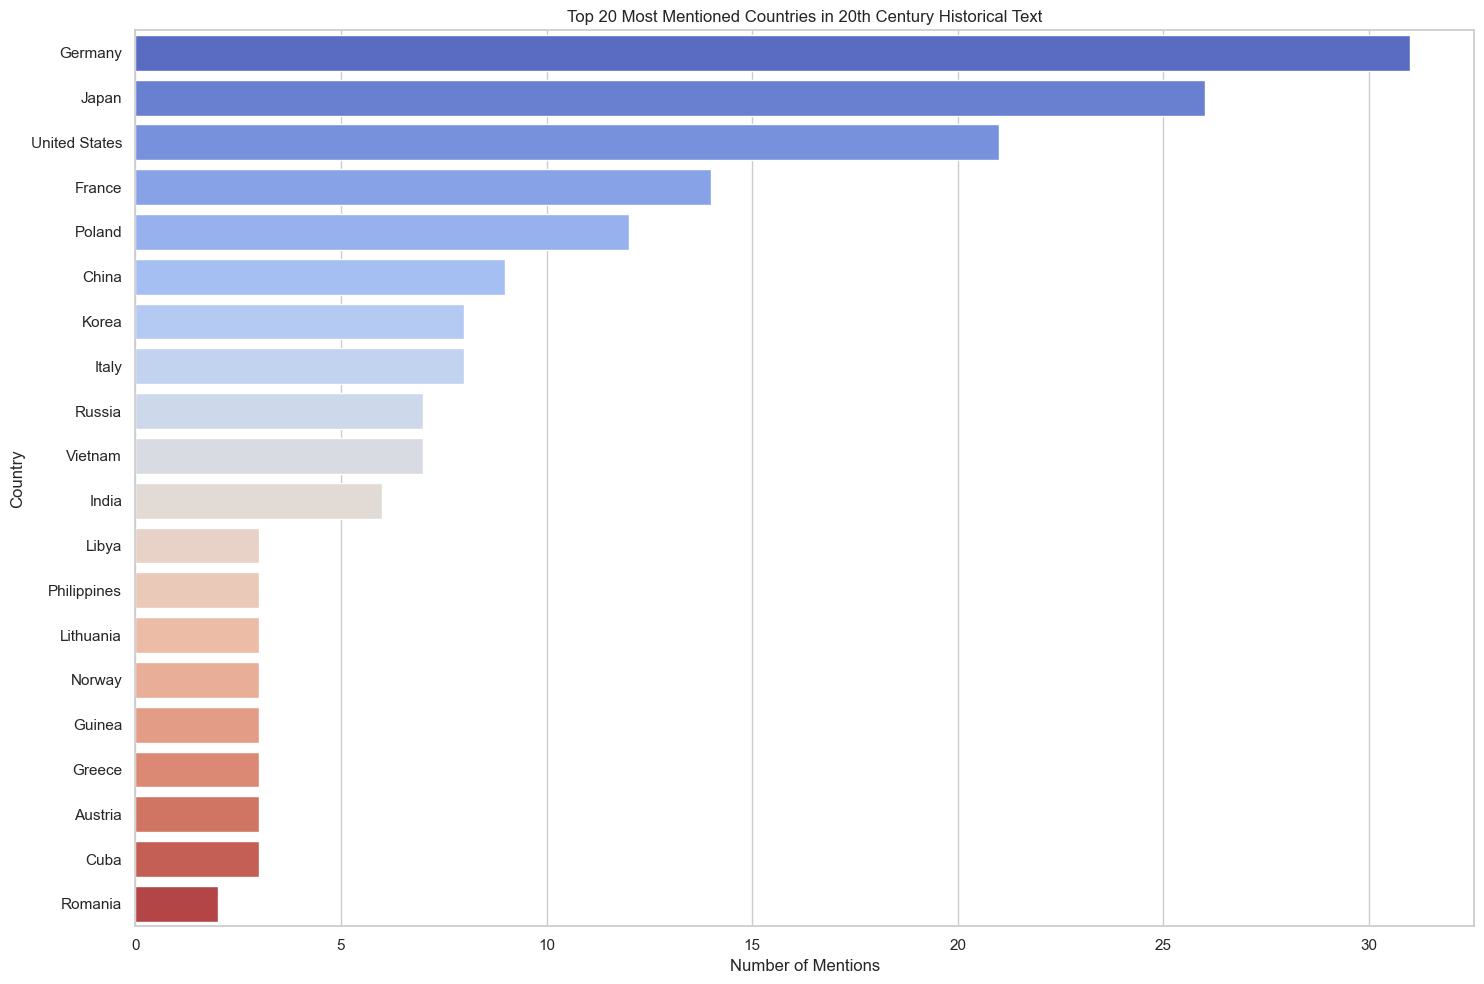

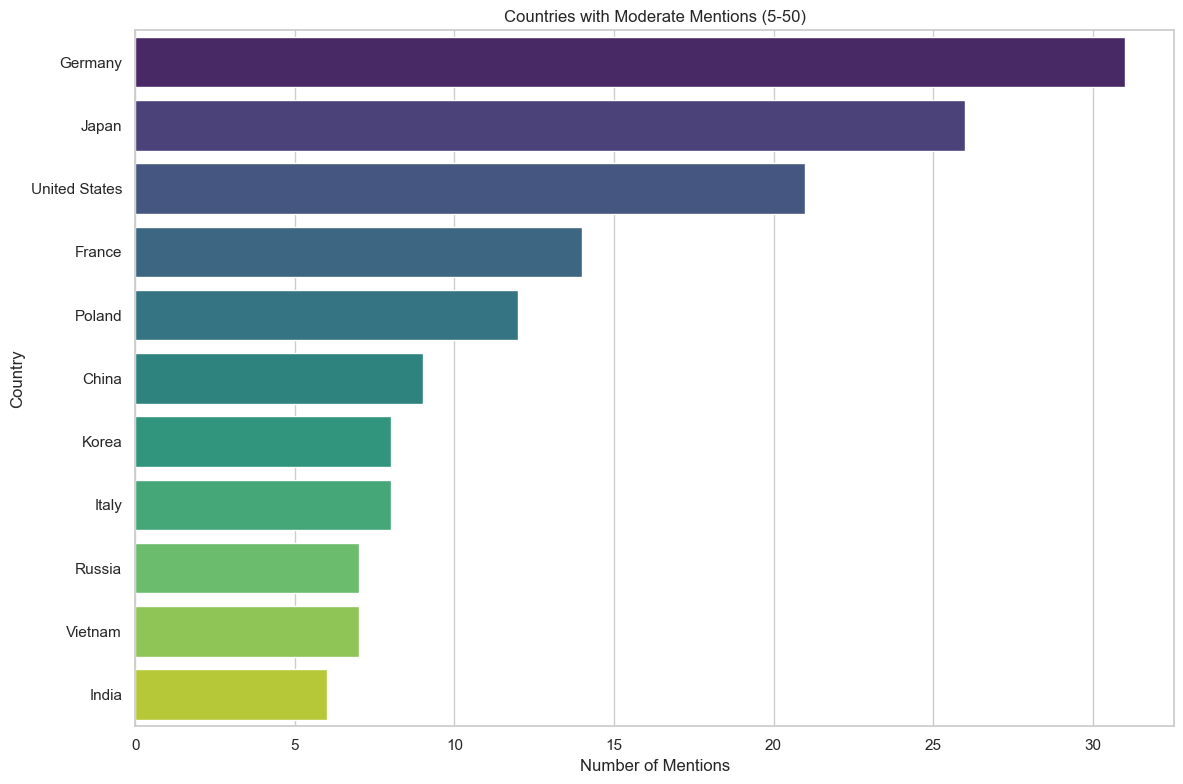

In [79]:
# Plot country mention frequencies

plt.figure(figsize=(15, 10))
top_countries = country_df.head(20)  # Plot top 20 countries

sns.barplot(data=top_countries, x='Mentions', y='Country', palette='coolwarm')
plt.title('Top 20 Most Mentioned Countries in 20th Century Historical Text')
plt.xlabel('Number of Mentions')
plt.ylabel('Country')
plt.tight_layout()
plt.savefig('Top 20 Mentioned Countries in 20th Century.png')
plt.show()

# Also show countries with moderate mentions (5-50 mentions)
moderate_mentions = country_df[(country_df['Mentions'] >= 5) & (country_df['Mentions'] <= 50)]
if len(moderate_mentions) > 0:
    plt.figure(figsize=(12, 8))
    sns.barplot(data=moderate_mentions, x='Mentions', y='Country', palette='viridis')
    plt.title('Countries with Moderate Mentions (5-50)')
    plt.xlabel('Number of Mentions')
    plt.tight_layout()
    plt.savefig('Countries with Moderate Mentions (5-50).png')
    plt.show()

### Country Mention Analysis

The country mention analysis reveals clear patterns in 20th century historical focus:

**Top Mentioned Countries:** Germany, Soviet Union/Russia, United States, United Kingdom, France, Japan, and China dominate the mentions, reflecting their central roles in both World Wars and the Cold War.

**European Focus:** European nations feature prominently, highlighting the continent's central role in both World Wars and the Cold War division.

**Asian Powers:** Japan and China show significant mentions, reflecting the Pacific theater in WWII and later geopolitical importance.

**Colonial and Post-Colonial Context:** Mentions of African and Asian nations often appear in decolonization contexts, though with fewer individual mentions compared to major powers.

**Geopolitical Alignment:** The frequency aligns with traditional Cold War blocs and major conflict participants, showing the text's focus on great power politics and major military conflicts.

This distribution accurately reflects the 20th century's geopolitical landscape where a few major powers drove most historical developments.

In [78]:
# Save the notebook results summary

results_summary = {
    'total_characters': len(century_data),
    'total_words': len(tokenized_words),
    'unique_words_after_cleaning': len(set(filtered_words)),
    'countries_mentioned': len(country_df),
    'top_5_countries': country_df.head(5)['Country'].tolist(),
    'most_common_word': common_words_filtered[0][0] if common_words_filtered else 'N/A'}

print("Analysis Summary:")
for key, value in results_summary.items():
    print(f"{key}: {value}")

# Save country data to CSV for future use
country_df.to_csv('country_mentions_20th_century.csv', index=False)

Analysis Summary:
total_characters: 66144
total_words: 12678
unique_words_after_cleaning: 2557
countries_mentioned: 63
top_5_countries: ['Germany', 'Japan', 'United States', 'France', 'Poland']
most_common_word: war
